# DAY7
#Trying same problem with train-test data

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as py
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

In [3]:
data=pd.read_csv("Advertising.csv")

In [4]:
data.shape

(200, 5)

In [5]:
data.info

<bound method DataFrame.info of      Unnamed: 0     TV  radio  newspaper  sales
0             1  230.1   37.8       69.2   22.1
1             2   44.5   39.3       45.1   10.4
2             3   17.2   45.9       69.3    9.3
3             4  151.5   41.3       58.5   18.5
4             5  180.8   10.8       58.4   12.9
5             6    8.7   48.9       75.0    7.2
6             7   57.5   32.8       23.5   11.8
7             8  120.2   19.6       11.6   13.2
8             9    8.6    2.1        1.0    4.8
9            10  199.8    2.6       21.2   10.6
10           11   66.1    5.8       24.2    8.6
11           12  214.7   24.0        4.0   17.4
12           13   23.8   35.1       65.9    9.2
13           14   97.5    7.6        7.2    9.7
14           15  204.1   32.9       46.0   19.0
15           16  195.4   47.7       52.9   22.4
16           17   67.8   36.6      114.0   12.5
17           18  281.4   39.6       55.8   24.4
18           19   69.2   20.5       18.3   11.3
19      

In [12]:
data.isnull().sum()*100/data.shape[0]

Unnamed: 0    0.0
TV            0.0
radio         0.0
newspaper     0.0
sales         0.0
dtype: float64

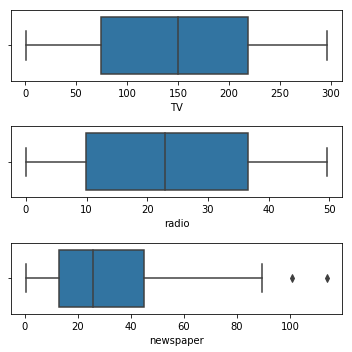

In [23]:
fig, axs = py.subplots(3, figsize=(5,5))
plt1= sns.boxplot(data['TV'],ax=axs[0])
plt2= sns.boxplot(data['radio'],ax=axs[1])
plt3= sns.boxplot(data['newspaper'],ax=axs[2])
py.tight_layout()
#no outliers present in the data

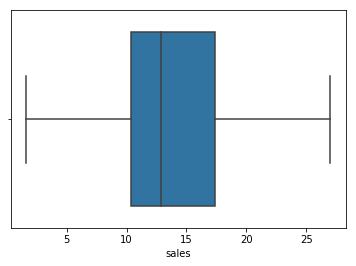

In [29]:
#EDA
#Univariate Analysis
sns.boxplot(data['sales'])
py.show()

[]

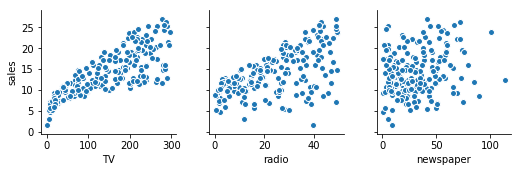

In [36]:
sns.pairplot(data,x_vars=['TV','radio','newspaper'], y_vars='sales',kind='scatter')
py.plot()

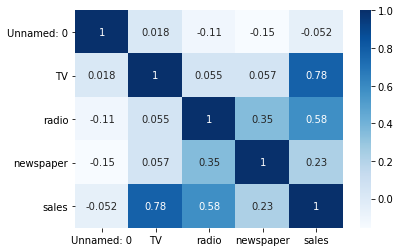

In [38]:
sns.heatmap(data.corr(),cmap='Blues',annot=True)
py.show()

In [39]:
#Both pairplot & heatmap, suggests that TV is more correlated with sales

In [67]:
x=data['TV']
y=data['sales']


(200,)

In [78]:
x_train,x_test,y_train, y_test=train_test_split(x,y,train_size=0.7,test_size=0.3,random_state=100)

In [79]:
x_train.head()


74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
Name: TV, dtype: float64

In [82]:
y_train.head()


74     17.0
3      18.5
185    22.6
26     15.0
90     11.2
Name: sales, dtype: float64

In [83]:
x_train_sm=sm.add_constant(x_train)

In [84]:
lr=sm.OLS(y_train,x_train_sm).fit()

In [85]:
lr.params

const    6.989666
TV       0.046497
dtype: float64

In [86]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     219.0
Date:                Mon, 22 Jun 2020   Prob (F-statistic):           2.84e-30
Time:                        15:57:35   Log-Likelihood:                -370.62
No. Observations:                 140   AIC:                             745.2
Df Residuals:                     138   BIC:                             751.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9897      0.548     12.762      0.0

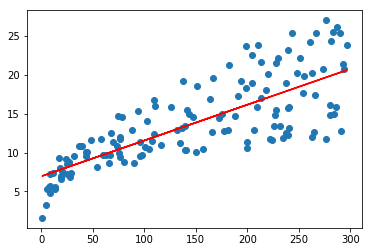

In [88]:
py.scatter(x_train,y_train)
py.plot(x_train,6.948+0.046*x_train,'r')
py.show()

In [89]:
y_train.shape

(140,)

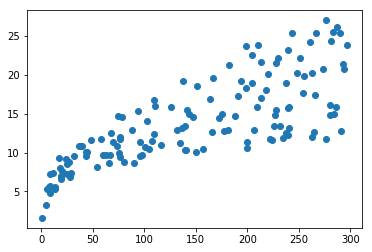

In [91]:
py.scatter(x_train,y_train)